In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("retail_sales.csv")


In [4]:
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [7]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

In [9]:
df['Shipping_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

In [10]:
df['Postal Code'] = df['Postal Code'].fillna(0)

In [11]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

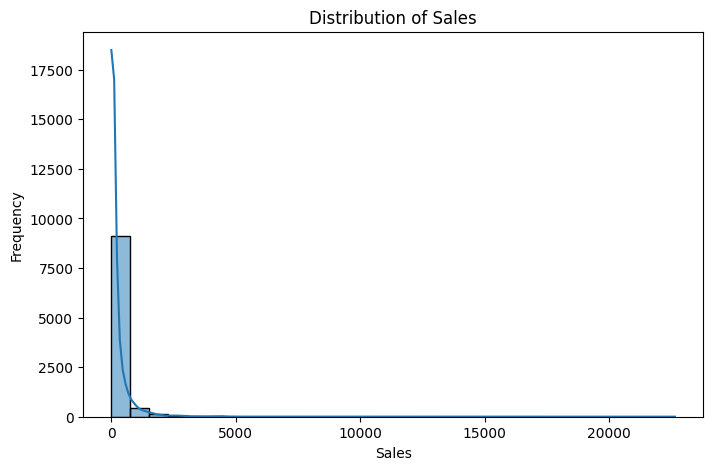

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

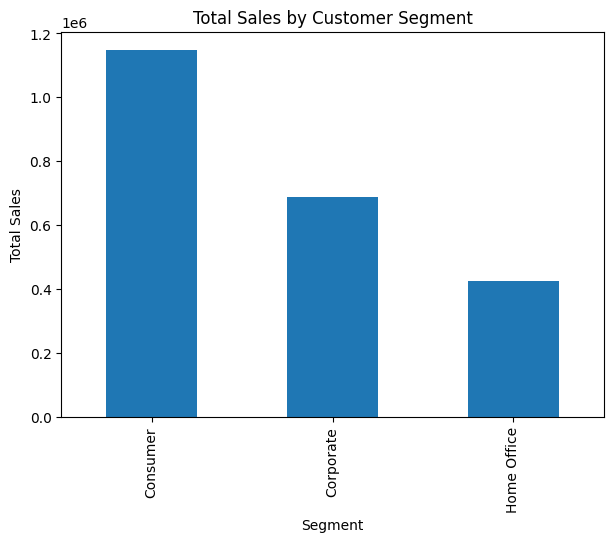

In [14]:
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(7,5))
segment_sales.plot(kind='bar')
plt.title('Total Sales by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.show()

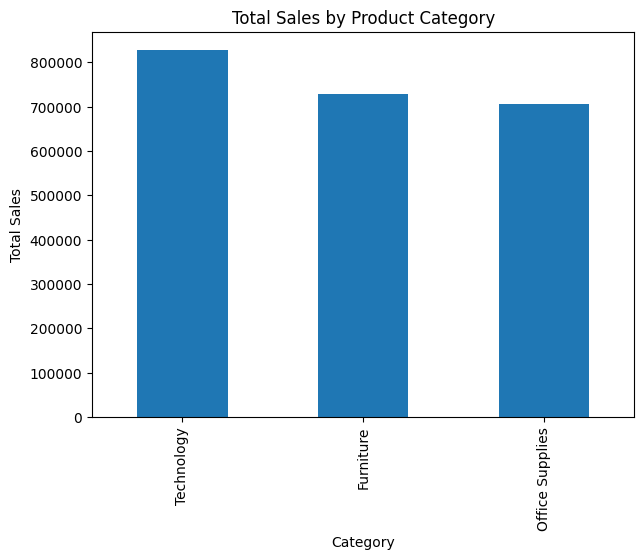

In [15]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(7,5))
category_sales.plot(kind='bar')
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

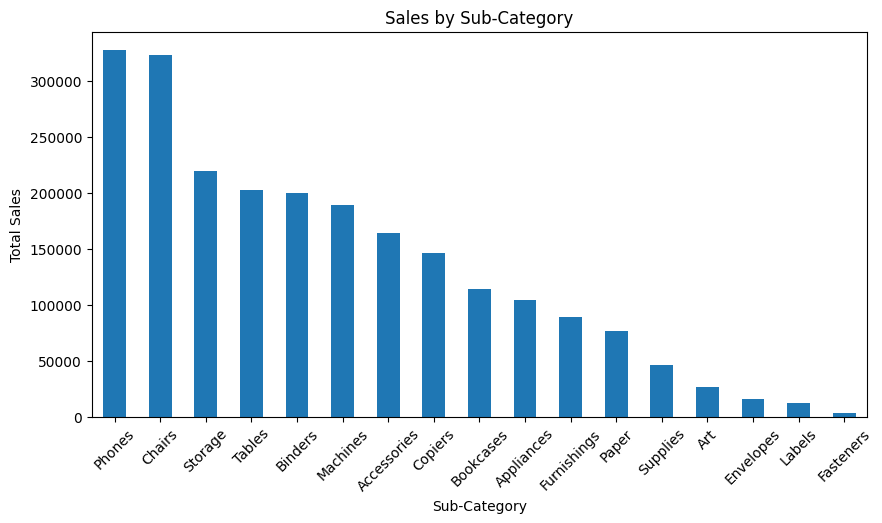

In [16]:
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
subcat_sales.plot(kind='bar')
plt.title('Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

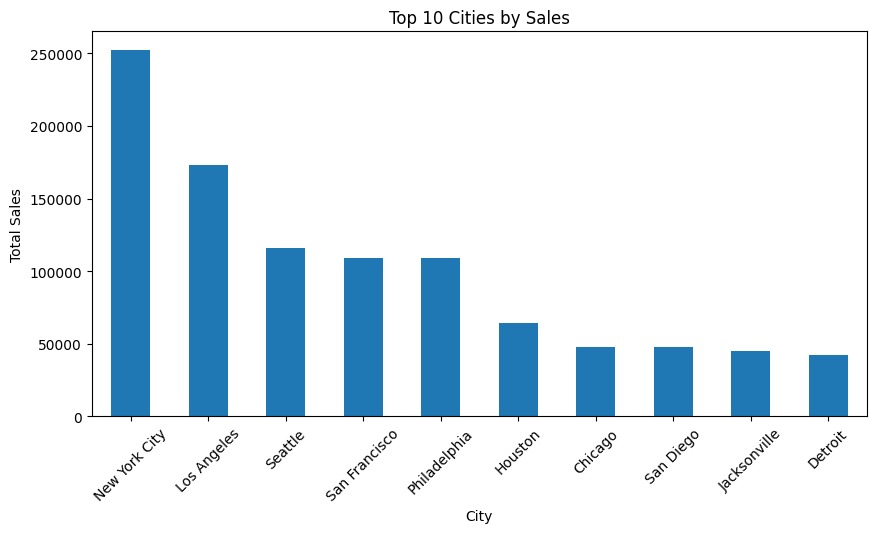

In [17]:
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_cities.plot(kind='bar')
plt.title('Top 10 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3353270517.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('Order Date').resample('M')['Sales'].sum()


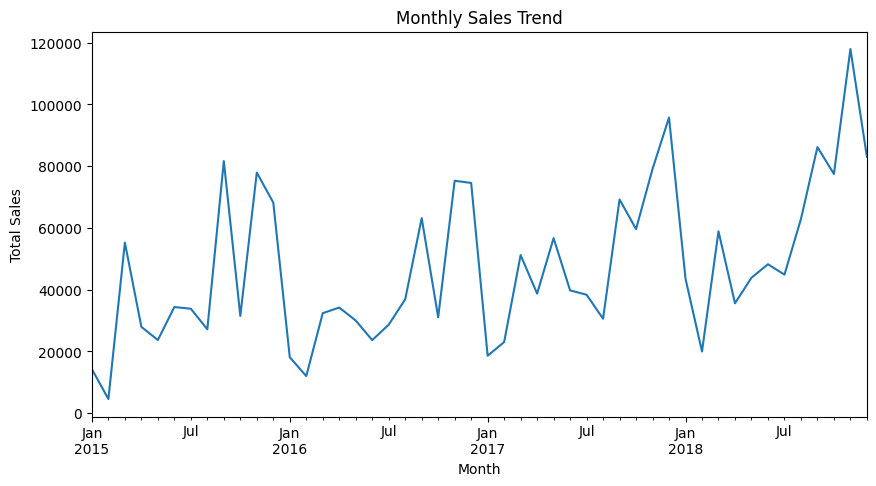

In [18]:
monthly_sales = df.set_index('Order Date').resample('M')['Sales'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

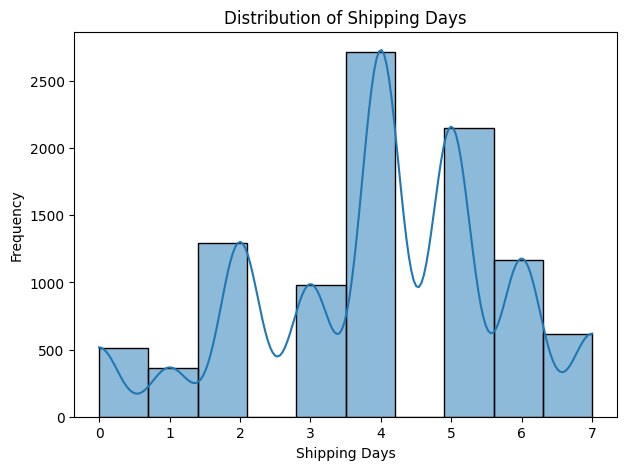

In [19]:
plt.figure(figsize=(7,5))
sns.histplot(df['Shipping_Days'], bins=10, kde=True)
plt.title('Distribution of Shipping Days')
plt.xlabel('Shipping Days')
plt.ylabel('Frequency')
plt.show()

## Key Findings

1. The sales distribution is highly right-skewed, indicating that most orders have low to medium sales values, while a few orders contribute very high revenue.

2. The Consumer segment generates the highest total sales, followed by the Corporate segment, suggesting that individual customers form the primary customer base.

3. Among product categories, Technology and Furniture contribute more revenue compared to Office Supplies.

4. Sub-category analysis shows that products such as Phones, Chairs, and Storage generate higher sales compared to other items.

5. City-wise analysis reveals that metropolitan cities like New York City and Los Angeles contribute significantly to overall sales.

6. Monthly sales trend shows fluctuations over time, indicating the presence of seasonal demand patterns.

7. Shipping days analysis indicates that most orders are delivered within a short time frame, suggesting an efficient logistics process.


## Business Recommendations

1. The company should focus on high-performing customer segments such as Consumers by offering personalized promotions and loyalty programs.

2. High-revenue product categories and sub-categories should be prioritized for inventory planning and marketing campaigns.

3. Marketing efforts can be increased in top-performing cities to maximize revenue generation.

4. Seasonal sales trends can be utilized to plan discounts and promotional events during high-demand periods.

5. Continuous monitoring of shipping performance can help maintain customer satisfaction and further improve delivery efficiency.
